# Validating XGBoost without stopword cleaning

the classifier without stopword cleaning has been proven to be the best on training and testing data which is why it is used for validation

importing all necessary libraries

In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing
import xgboost as xgb

pd.set_option('display.max_colwidth', None) #setting to show full text content


In [5]:
# Load the classifier from the file
with open('../Training/XGBoost/XGBoost_with_stopwords.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

# load the vectorizer from file
with open('../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

XGBClassifier(base_score=None, booster=None, boosting_type='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
TfidfVectorizer()


In [8]:
# loading dataset
xgb_val = pd.read_csv('../../Data-Preparation/Twitter-Corpus/full_corpus_preprocessed.csv')

In [9]:
xgb_val.head()

,Ground_Truth_Label,Text,target_number
0,positive,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is,4
1,positive,@Apple will be adding more carrier support to the iPhone 4S (just announced),4
2,positive,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY,4
3,positive,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!,4
4,positive,I just realized that the reason I got into twitter was ios5 thanks @apple,4


In [11]:
# extraction of feature and labels
xgb_val['target_number'] = xgb_val['target_number'].replace(4,1)
X_val_stop = xgb_val.drop(['target_number'], axis=1).copy()
Y_val_stop = xgb_val['target_number'].copy()

Extraction of features is necessary for working with XGBoost

### Vectorization of the Data

Vectorization is a necessary step, as machine learning models are only capable of processing numerical data. 

In [12]:
# astype(str) is necesarry 
# Vectorization is a necessary step, as machine learning models are only capable of processing numerical data. 
X = loaded_vectorizer.transform(xgb_val['Text'].astype(str))

In [13]:
# predict the sentiment
predictions_val = classifier.predict(X)

In [15]:
# calculate metrics
accuracy = accuracy_score(Y_val_stop, predictions_val)
precision = precision_score(Y_val_stop, predictions_val, pos_label=1)
recall = recall_score(Y_val_stop, predictions_val, pos_label=1)
f1 = f1_score(Y_val_stop, predictions_val, pos_label=1)

beta = 1 / (2**0.5)
f_beta = fbeta_score(Y_val_stop, predictions_val, beta=beta, pos_label=1)


# visualize metrics
print('XGBoost Validation')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

XGBoost Validation
Accuracy: 0.68
Precision: 0.63
Recall: 0.83
F1 Score: 0.72
F-beta Score (beta=0.7071067811865475): 0.6889952153110048


In [16]:
print("\nClassification Report:\n")
print(classification_report(Y_val_stop, predictions_val, target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.76      0.52      0.62       519
    positive       0.63      0.83      0.72       519

    accuracy                           0.68      1038
   macro avg       0.70      0.68      0.67      1038
weighted avg       0.70      0.68      0.67      1038



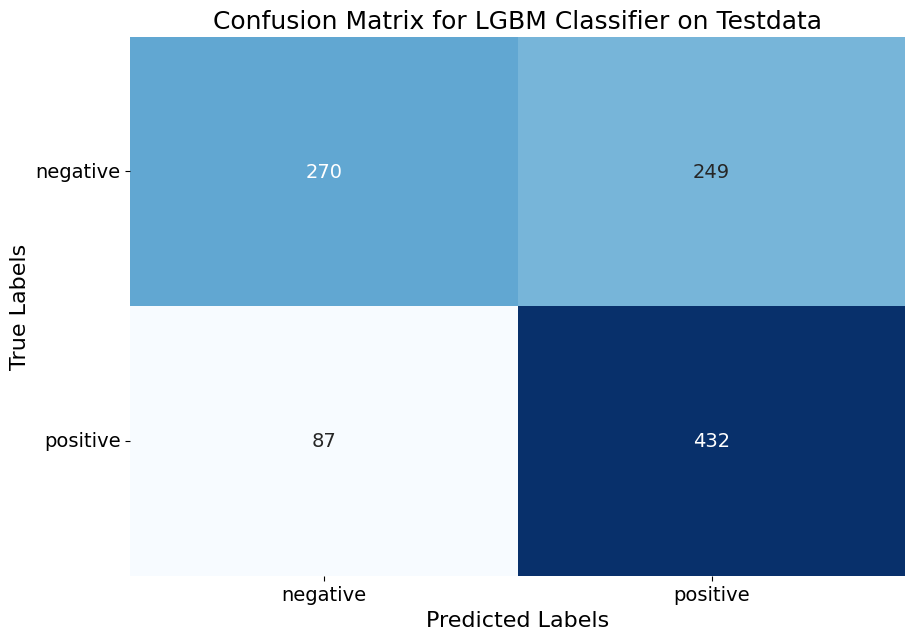

In [17]:
cm_nb = confusion_matrix(Y_val_stop, predictions_val)


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for XGBoost Classifier on Testdata', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()